In [ ]:
#C2054492

In [2404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2405]:
df = pd.read_csv("Coursework_1_data.csv")

In [2406]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2407]:
df.shape

/Users/can/opt/anaconda3/envs/Python_ML/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(12330, 18)

In [2408]:
df.shape

(12330, 18)

In [2409]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['VisitorType'] = labelencoder.fit_transform(df['VisitorType'])
df['Month'] = labelencoder.fit_transform(df['Month'])
df['Weekend'] = labelencoder.fit_transform(df["Weekend"])

In [2412]:
X_num = df.iloc[:,0:10]
X_cat = df.iloc[:,10:17]
y = df.Revenue

In [2416]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

In [2419]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
print(len(categorical_features))
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown= "ignore"))
])

7


In [2420]:
numerical_features = ["Administrative_Duration","Informational_Duration", "Administrative", "Informational", "ProductRelated",
                      "ProductRelated_Duration", "PageValues", "SpecialDay", "ExitRates", "BounceRates"]
print(len(numerical_features))
numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("pt", PowerTransformer())
])

10


In [2421]:
preprocessing = ColumnTransformer([
    ("categorical", categorical_transformer, categorical_features),
    ("numerical", numerical_transformer, numerical_features)
])

In [2422]:
X = df.drop("Revenue",1)
y = df.Revenue

In [2423]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2424]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2425]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train  = y_train.values
y_test  = y_test.values

In [2426]:
X_train.shape

(9247, 17)

In [2427]:
pd.DataFrame(y_train).value_counts()

False    7823
True     1424
dtype: int64

In [2428]:
#smote = SMOTE(sampling_strategy=0.5)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [2429]:

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [2430]:
param_grid_random_forest = {'bootstrap': [True],
             'max_depth': [ 20, 40, 50],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [10, 50, 100, 200]}

In [2431]:
myClassifier = Pipeline([
    ("preprocessing", preprocessing),
    ("gridSearch", GridSearchCV(RandomForestClassifier(), param_grid_random_forest, refit= True, verbose= 3))
])

myClassifier.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.823, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.833, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.825, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.849, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, score=0.847, total=   0.1s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.828, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  5.9min finished


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
   

In [2432]:
y_pred = myClassifier.predict(X_test)

In [2433]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
accuracyScore = accuracy_score(y_test, y_pred)
precisionScore = precision_score(y_test, y_pred)
recallScore = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
f05_score = fbeta_score(y_test, y_pred, beta= 0.5)
f2_score = fbeta_score(y_test, y_pred, beta= 2)
Kappa_score = cohen_kappa_score(y_test, y_pred)
Auc_score = roc_auc_score(y_test, y_pred)




print("Accuracy Score: {}\n".format(accuracyScore))
print("Precision Score: {}\n".format(precisionScore))
print("Recall Score: {}\n".format(recallScore))
print("F1 Score: {}\n".format(f1Score))
print("F0.5 Score: {}\n".format(f05_score))
print("F2 Score: {}\n".format(f2_score))
print("Kappa_score: {}\n".format(Kappa_score))
print("AUC score: {}\n".format(Auc_score))

Accuracy Score: 0.8566331495296788

Precision Score: 0.5259259259259259

Recall Score: 0.8801652892561983

F1 Score: 0.6584234930448223

F0.5 Score: 0.5719656283566058

F2 Score: 0.775673707210488

Kappa_score: 0.5748676732010076

AUC score: 0.8662080774868911



In [2455]:
from sklearn.metrics import confusion_matrix, classification_report

print("*************RandomForest-RandomUnderSampling***********")

print("Recall Test: {}".format(recall_score(y_test, y_pred)))

print("F2 Score: {}".format(fbeta_score(y_test, y_pred, beta = 2)))
      
print(confusion_matrix(y_test, y_pred))
      
print(classification_report(y_test, y_pred))

*************RandomForest-RandomUnderSampling***********
Recall Test: 0.8801652892561983
F2 Score: 0.775673707210488
[[2215  384]
 [  58  426]]
              precision    recall  f1-score   support

       False       0.97      0.85      0.91      2599
        True       0.53      0.88      0.66       484

    accuracy                           0.86      3083
   macro avg       0.75      0.87      0.78      3083
weighted avg       0.90      0.86      0.87      3083



In [2435]:
myClassifier.named_steps["gridSearch"].best_estimator_.feature_importances_

array([3.05874667e-03, 5.17240769e-03, 2.18666717e-04, 2.00968474e-03,
       1.98386955e-03, 7.97000957e-03, 1.15078979e-02, 2.93951229e-02,
       5.71757313e-03, 5.46374143e-03, 4.12045682e-03, 6.23400664e-03,
       5.44393590e-03, 1.78520087e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.07882900e-04, 3.37041300e-03, 5.60367985e-03,
       2.12556538e-04, 2.41652395e-03, 1.90777522e-03, 6.35142630e-04,
       3.68042551e-05, 9.48954908e-04, 6.59562388e-04, 0.00000000e+00,
       4.13801424e-05, 1.41361662e-04, 5.93598009e-03, 3.23515551e-03,
       5.70284523e-03, 3.57945394e-03, 1.39947048e-03, 2.84957010e-03,
       2.25343770e-03, 1.40777122e-03, 1.93692398e-03, 4.86105304e-03,
       9.86789296e-03, 5.69059832e-03, 3.30051246e-03, 1.97182942e-03,
       1.05054315e-03, 1.50542421e-04, 4.12960594e-03, 6.62553360e-05,
       1.71593958e-03, 1.69789454e-03, 4.25023321e-03, 5.72038732e-06,
       8.44897986e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

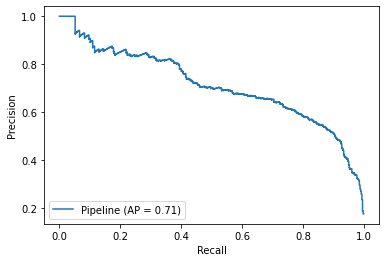

In [2436]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(myClassifier ,X_test, y_test)

In [2439]:
myClassifier.named_steps["gridSearch"].best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}